Importing dependencies

In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import pandas as pd
import time
from random import shuffle

%matplotlib inline

Importing data

In [2]:
te.login()

coca_cola = te.getHistorical('XB1:COM', initDate='2020-01-01')
time.sleep(1)
pepsico = te.getHistorical('PEP:US', initDate='2020-01-01')

Data manipulation and creation of the dataframe to be plotted

In [3]:
coca_cola = coca_cola[['Date', 'Close']].rename(columns={'Close': 'Coca-Cola'}, inplace=False)
pepsico = pepsico[['Date', 'Close']].rename(columns={'Close': 'PepsiCo'}, inplace=False)

df = pd.merge(coca_cola, pepsico, on='Date')

df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df.sort_values(['Date'], inplace=True)
df.set_index('Date', inplace=True)
df

,Coca-Cola,PepsiCo
Date,,
2020-11-11,1.1759,143.92000
2020-11-12,1.1571,143.78999
2020-11-13,1.1254,144.78000
2020-11-16,1.1468,145.47501
2020-11-17,1.1532,145.23000
2020-11-18,1.1629,143.56000
2020-11-19,1.1625,143.45000
2020-11-20,1.1752,143.50000
2020-11-23,1.2040,143.03000


Creating a useful function for plotting the graph

In [4]:
# the easiest thing is that you don’t need to touch the function unless you want to configure the legend settings
def plot_multi(data, cols=None, spacing=.1, **kwargs):
    from pandas import plotting
    import matplotlib.colors as mcolors

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return

    colors = list(mcolors.BASE_COLORS.keys())
    ## ['b', 'c', 'g', 'k', 'm', 'r', 'w', 'y']
    shuffle(colors)

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel(ylabel=cols[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc='lower right', bbox_to_anchor=(1, 1))
    return ax

Plotting

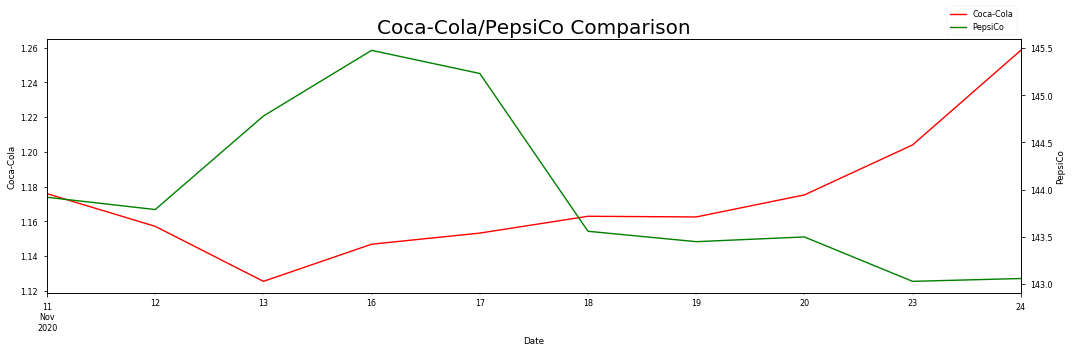

In [5]:
# for s in plt.style.available: print(s) # If you want to know what styles are available
plt.style.use('seaborn-paper')
ax = plot_multi(df, figsize=(15, 5))
ax.set_title('Coca-Cola/PepsiCo Comparison', color='black', size=20)
plt.tight_layout()

# PS: the colors of the lines are random, if one of them does not appear it is probably because it has the same color as the background, run the script again if applicable